In [1]:
import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt


In [2]:
df = pd.read_csv('influenza-surveillance-4.csv')

In [3]:
df.head()

,season,date_code,weekending,region,Influenza_Category,Count
0,2009-2010,200940,10/04/09,Bay Area,Influenza_A,56
1,2009-2010,200940,10/04/09,Bay Area,Influenza_AH3,0
2,2009-2010,200940,10/04/09,Bay Area,Influenza_AH1,0
3,2009-2010,200940,10/04/09,Bay Area,Influenza_AH1pdm09,0
4,2009-2010,200940,10/04/09,Bay Area,Influenza_ANotSubtyped,56


In [4]:
df_new = df[df['Influenza_Category'] == 'Influenza_Total']

In [5]:
df_new.head()

,season,date_code,weekending,region,Influenza_Category,Count
6,2009-2010,200940,10/04/09,Bay Area,Influenza_Total,56
14,2009-2010,200940,10/04/09,California,Influenza_Total,615
22,2009-2010,200940,10/04/09,Central,Influenza_Total,193
30,2009-2010,200940,10/04/09,Lower Southern,Influenza_Total,195
38,2009-2010,200940,10/04/09,Northern,Influenza_Total,53


In [6]:
final_data = df_new.groupby('date_code').sum()

In [7]:
final_data.head()

,Count
date_code,
200940,1230
200941,1680
200942,1754
200943,1740
200944,1704


In [8]:
final_data.describe()

,Count
count,574.000000
mean,178.397213
std,342.565756
min,0.000000
25%,4.000000
50%,22.000000
75%,177.000000
max,2000.000000


In [9]:
final_data.head()

,Count
date_code,
200940,1230
200941,1680
200942,1754
200943,1740
200944,1704


In [10]:
import matplotlib.pyplot as plt


Text(0, 0.5, 'No. of infections')

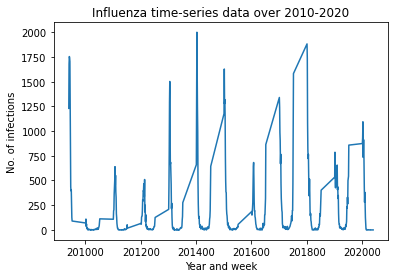

In [11]:
plt.plot(final_data)
plt.title("Influenza time-series data over 2010-2020")
plt.xlabel("Year and week")
plt.ylabel("No. of infections")

In [12]:
!pip install hmmlearn

     |████████████████████████████████| 374 kB 5.1 MB/s 


In [ ]:
pip install --user git+https://github.com/hmmlearn/hmmlearn

  Cloning https://github.com/hmmlearn/hmmlearn to /tmp/pip-req-build-dxz9fjdn
  Running command git clone -q https://github.com/hmmlearn/hmmlearn /tmp/pip-req-build-dxz9fjdn


In [13]:
from hmmlearn import hmm

In [22]:
model = hmm.GaussianHMM(n_components=4)

In [23]:
model.fit(final_data)

GaussianHMM(n_components=4)

In [24]:
model.get_params()

{'algorithm': 'viterbi',
 'covariance_type': 'diag',
 'covars_prior': 0.01,
 'covars_weight': 1,
 'init_params': 'stmc',
 'means_prior': 0,
 'means_weight': 0,
 'min_covar': 0.001,
 'n_components': 4,
 'n_iter': 10,
 'params': 'stmc',
 'random_state': None,
 'startprob_prior': 1.0,
 'tol': 0.01,
 'transmat_prior': 1.0,
 'verbose': False}

In [25]:
z2 = model.predict(final_data[350:])

Text(0, 0.5, 'Hidden stages')

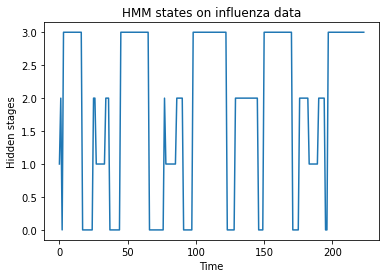

In [26]:
import matplotlib.pyplot as plt
plt.plot(z2)
plt.title("HMM states on influenza data")
plt.xlabel("Time")
plt.ylabel("Hidden stages")

HMM for sentiment Analysis

In [27]:
df_twitter = pd.read_csv('combined-data.csv')
df_twitter

,date,Sentiment,Positive,Negative
0,2021-03-16,0.216083,0.216083,0.000000
1,2021-03-17,0.068279,0.098033,0.029754
2,2021-03-18,0.069473,0.087110,0.017637
3,2021-03-19,0.093897,0.121282,0.027385
4,2021-03-20,0.108174,0.122696,0.014522
...,...,...,...,...
176,2021-09-10,0.138824,0.152765,0.013941
177,2021-09-11,0.028333,0.063000,0.034667
178,2021-09-12,0.051527,0.085405,0.033878
179,2021-09-13,0.111227,0.126068,0.014841


In [28]:
df_twitter['index'] = range(1, len(df_twitter) + 1)

In [29]:
df_pos = df_twitter.loc[:,['index','Positive']]
df_pos

,index,Positive
0,1,0.216083
1,2,0.098033
2,3,0.087110
3,4,0.121282
4,5,0.122696
...,...,...
176,177,0.152765
177,178,0.063000
178,179,0.085405
179,180,0.126068


In [95]:
model_pos = hmm.GaussianHMM(n_components=5)

In [96]:
model_pos.fit(df_pos)

GaussianHMM(n_components=5)

In [97]:
h_pos = model_pos.predict(df_pos)

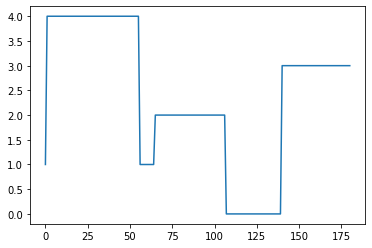

In [98]:
plt.plot(h_pos)

Negative Twitter

In [35]:
df_neg = df_twitter.loc[:,['index','Negative']]
df_neg

,index,Negative
0,1,0.000000
1,2,0.029754
2,3,0.017637
3,4,0.027385
4,5,0.014522
...,...,...
176,177,0.013941
177,178,0.034667
178,179,0.033878
179,180,0.014841


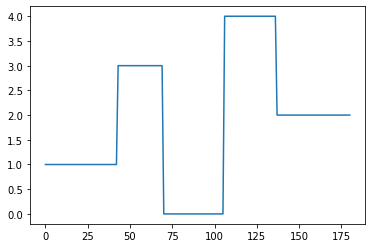

In [89]:
model_neg = hmm.GaussianHMM(n_components=5)
model_neg.fit(df_neg)
h_neg = model_neg.predict(df_neg)
plt.plot(h_neg)

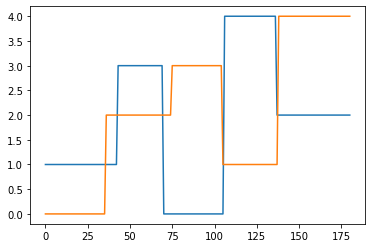

In [90]:
plt.plot(h_neg)
plt.plot(h_pos)

In [41]:
df_doge = pd.read_csv("doge.csv")

In [42]:
df_doge

,Currency,Date,Closing Price (USD),24h Open (USD),24h High (USD),24h Low (USD)
0,DOGE,2021-03-18,0.057710,0.057843,0.059296,0.056935
1,DOGE,2021-03-19,0.058850,0.057317,0.060006,0.056447
2,DOGE,2021-03-20,0.060044,0.058444,0.060794,0.058058
3,DOGE,2021-03-21,0.058235,0.058987,0.059651,0.056746
4,DOGE,2021-03-22,0.055231,0.057586,0.058024,0.054645
...,...,...,...,...,...,...
177,DOGE,2021-09-11,0.241073,0.239852,0.248014,0.237964
178,DOGE,2021-09-12,0.252790,0.241175,0.254404,0.238995
179,DOGE,2021-09-13,0.236626,0.250270,0.252245,0.228404
180,DOGE,2021-09-14,0.239788,0.235915,0.241781,0.233995


In [43]:
df_doge['index'] = range(1, len(df_doge) + 1)

In [44]:
df_doge = df_doge.loc[:,['index','Closing Price (USD)']]
df_doge

,index,Closing Price (USD)
0,1,0.057710
1,2,0.058850
2,3,0.060044
3,4,0.058235
4,5,0.055231
...,...,...
177,178,0.241073
178,179,0.252790
179,180,0.236626
180,181,0.239788


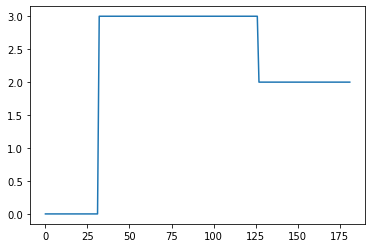

In [140]:
model_i = hmm.GaussianHMM(n_components=5)
model_i.fit(final_data[500:])
i_doge = model_i.predict(df_doge)
plt.plot(i_doge)

In [111]:
model_pos = hmm.GaussianHMM(n_components=5)
model_pos.fit(df_pos)

GaussianHMM(n_components=5)

In [125]:
model_neg = hmm.GaussianHMM(n_components=5)
model_neg.fit(df_neg)

GaussianHMM(n_components=5)

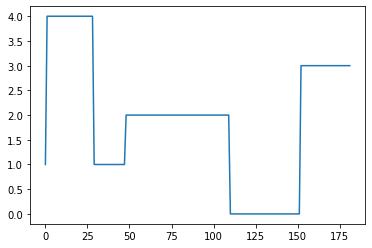

In [113]:
h_doge = model_pos.predict(df_doge)
plt.plot(h_doge)

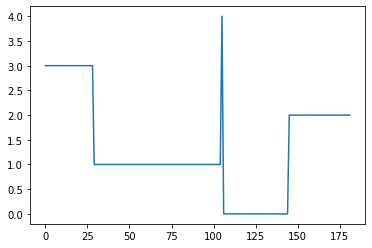

In [126]:
h_ndoge = model_neg.predict(df_doge)
plt.plot(h_ndoge)

Text(0, 0.5, 'Crypto Bubbles')

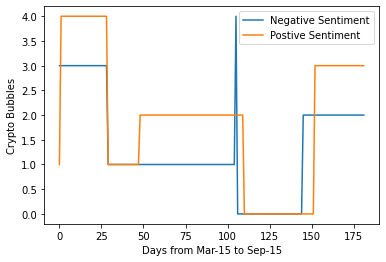

In [132]:
plt.plot(h_ndoge,label='Negative Sentiment')
plt.plot(h_doge,label='Postive Sentiment')
# plt.plot(i_doge,label='Influenza data')
plt.legend(loc='best')
plt.xlabel("Days from Mar-15 to Sep-15")
plt.ylabel("Crypto Bubbles")


Text(0, 0.5, 'Price in USD')

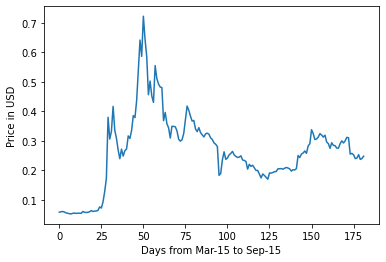

In [133]:
plt.plot(df_doge['Closing Price (USD)'])
plt.xlabel("Days from Mar-15 to Sep-15")
plt.ylabel("Price in USD")


In [134]:
best_idoge = i_doge

Text(0, 0.5, 'Scores and price')

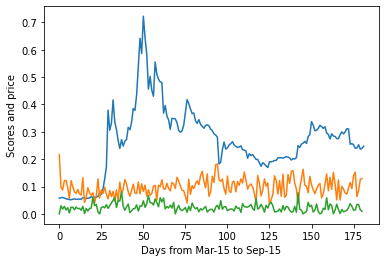

In [135]:
plt.plot(df_doge['Closing Price (USD)'])
plt.plot(df_pos['Positive'])
plt.plot(df_neg['Negative'])
plt.xlabel('Days from Mar-15 to Sep-15')
plt.ylabel('Scores and price')

Training HMM On doge only [ Not Relevant]

In [ ]:
model_doge = hmm.GaussianHMM(n_components=5)

In [ ]:
model_doge.fit(df_doge)

GaussianHMM(n_components=5)

In [ ]:
h_doge2 = model_doge.predict(df_doge)

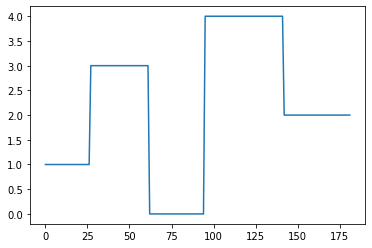

In [ ]:
plt.plot(h_doge2)

In [155]:
df_covid = pd.read_csv('US-covid-data.csv')
df_covid

,Unnamed: 0,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,tests_units,total_vaccinations,people_vaccinated,people_fully_vaccinated,total_boosters,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,total_boosters_per_hundred,new_vaccinations_smoothed_per_million,new_people_vaccinated_smoothed,new_people_vaccinated_smoothed_per_hundred,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,129251,USA,North America,United States,2020-01-22,1.0,NaN,NaN,NaN,NaN,NaN,0.003,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,332915074.0,35.608,38.3,15.413,9.732,54225.446,1.2,151.089,10.79,19.1,24.6,NaN,2.77,78.86,0.926,NaN,NaN,NaN,NaN
1,129252,USA,North America,United States,2020-01-23,1.0,0.0,NaN,NaN,NaN,NaN,0.003,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,332915074.0,35.608,38.3,15.413,9.732,54225.446,1.2,151.089,10.79,19.1,24.6,NaN,2.77,78.86,0.926,NaN,NaN,NaN,NaN
2,129253,USA,North America,United States,2020-01-24,2.0,1.0,NaN,NaN,NaN,NaN,0.006,0.003,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,332915074.0,35.608,38.3,15.413,9.732,54225.446,1.2,151.089,10.79,19.1,24.6,NaN,2.77,78.86,0.926,NaN,NaN,NaN,NaN
3,129254,USA,North America,United States,2020-01-25,2.0,0.0,NaN,NaN,NaN,NaN,0.006,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,332915074.0,35.608,38.3,15.413,9.732,54225.446,1.2,151.089,10.79,19.1,24.6,NaN,2.77,78.86,0.926,NaN,NaN,NaN,NaN
4,129255,USA,North America,United States,2020-01-26,5.0,3.0,NaN,NaN,NaN,NaN,0.015,0.009,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,332915074.0,35.608,38.3,15.413,9.732,54225.446,1.2,151.089,10.79,19.1,24.6,NaN,2.77,78.86,0.926,-9247.3,-3.72,-3.1,-27.776754
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
674,129925,USA,North America,United States,2021-11-26,48176523.0,51098.0,73890.429,776349.0,259.0,752.143,144711.149,153.487,221.950,2331.973,0.778,2.259,0.79,12766.0,38.346,48415.0,145.427,NaN,NaN,NaN,NaN,400323.0,662111234.0,1988.829,1.202,839898.0,2.523,0.088,11.4,tests performed,459682870.0,232907822.0,195318289.0,40494410.0,1003625.0,1014462.0,136.68,69.25,58.07,12.04,3016.0,309792.0,0.092,NaN,332915074.0,35.608,38.3,15.413,9.732,54225.446,1.2,151.089,10.79,19.1,24.6,NaN,2.77,78.86,0.926,NaN,NaN,NaN,NaN
675,129926,USA,North America,United States,2021-11-27,48201079.0,

In [151]:
df_covid = df_covid['new_cases']

In [152]:
df_covid

0           NaN
1           0.0
2           1.0
3           0.0
4           3.0
         ...   
674     51098.0
675     24556.0
676     28131.0
677    209092.0
678    116588.0
Name: new_cases, Length: 679, dtype: float64

In [156]:
df_covid['index'] = range(1, len(df_covid) + 1)

In [148]:
df_covid = df_covid[500:]

In [157]:
df_covid

,Unnamed: 0,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,tests_units,total_vaccinations,people_vaccinated,people_fully_vaccinated,total_boosters,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,total_boosters_per_hundred,new_vaccinations_smoothed_per_million,new_people_vaccinated_smoothed,new_people_vaccinated_smoothed_per_hundred,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million,index
0,129251,USA,North America,United States,2020-01-22,1.0,NaN,NaN,NaN,NaN,NaN,0.003,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,332915074.0,35.608,38.3,15.413,9.732,54225.446,1.2,151.089,10.79,19.1,24.6,NaN,2.77,78.86,0.926,NaN,NaN,NaN,NaN,1
1,129252,USA,North America,United States,2020-01-23,1.0,0.0,NaN,NaN,NaN,NaN,0.003,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,332915074.0,35.608,38.3,15.413,9.732,54225.446,1.2,151.089,10.79,19.1,24.6,NaN,2.77,78.86,0.926,NaN,NaN,NaN,NaN,2
2,129253,USA,North America,United States,2020-01-24,2.0,1.0,NaN,NaN,NaN,NaN,0.006,0.003,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,332915074.0,35.608,38.3,15.413,9.732,54225.446,1.2,151.089,10.79,19.1,24.6,NaN,2.77,78.86,0.926,NaN,NaN,NaN,NaN,3
3,129254,USA,North America,United States,2020-01-25,2.0,0.0,NaN,NaN,NaN,NaN,0.006,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,332915074.0,35.608,38.3,15.413,9.732,54225.446,1.2,151.089,10.79,19.1,24.6,NaN,2.77,78.86,0.926,NaN,NaN,NaN,NaN,4
4,129255,USA,North America,United States,2020-01-26,5.0,3.0,NaN,NaN,NaN,NaN,0.015,0.009,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,332915074.0,35.608,38.3,15.413,9.732,54225.446,1.2,151.089,10.79,19.1,24.6,NaN,2.77,78.86,0.926,-9247.3,-3.72,-3.1,-27.776754,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
674,129925,USA,North America,United States,2021-11-26,48176523.0,51098.0,73890.429,776349.0,259.0,752.143,144711.149,153.487,221.950,2331.973,0.778,2.259,0.79,12766.0,38.346,48415.0,145.427,NaN,NaN,NaN,NaN,400323.0,662111234.0,1988.829,1.202,839898.0,2.523,0.088,11.4,tests performed,459682870.0,232907822.0,195318289.0,40494410.0,1003625.0,1014462.0,136.68,69.25,58.07,12.04,3016.0,309792.0,0.092,NaN,332915074.0,35.608,38.3,15.413,9.732,54225.446,1.2,151.089,10.79,19.1,24.6,NaN,2.77,78.86,0.926,NaN,NaN,NaN,NaN,675
675,129926,USA,North America,United State

In [161]:
df_covid = df_covid.loc[:,['index','new_cases']]

In [162]:
df_covid

,index,new_cases
0,1,NaN
1,2,0.0
2,3,1.0
3,4,0.0
4,5,3.0
...,...,...
674,675,51098.0
675,676,24556.0
676,677,28131.0
677,678,209092.0


In [163]:
df_covid = df_covid[500:]

In [164]:
df_covid

,index,new_cases
500,501,14606.0
501,502,5751.0
502,503,14902.0
503,504,13082.0
504,505,18989.0
...,...,...
674,675,51098.0
675,676,24556.0
676,677,28131.0
677,678,209092.0


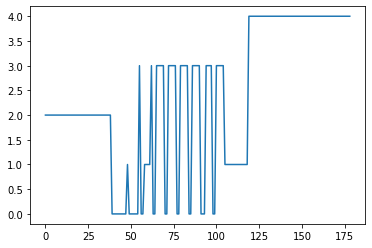

In [181]:
model_c = hmm.GaussianHMM(n_components=5)
model_c.fit(df_covid)
c_doge = model_c.predict(df_covid)
plt.plot(c_doge)

Fitting a model with 119 free scalar parameters with only 74 data points will result in a degenerate solution.


Text(0, 0.5, 'Epidemic Stages')

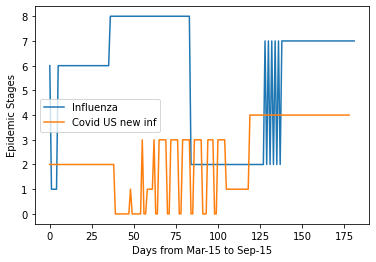

In [196]:
model_i = hmm.GaussianHMM(n_components=10)
model_i.fit(final_data[500:])
i_doge = model_i.predict(df_doge)


Text(0, 0.5, 'Epidemic Stages')

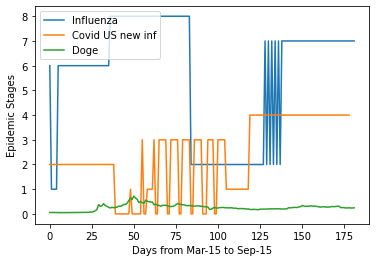

In [201]:
plt.plot(i_doge,label='Influenza')
plt.plot(c_doge, label ='Covid US new inf')
plt.plot(df_doge['Closing Price (USD)'],label = 'Doge')
plt.legend(loc='upper left')
plt.xlabel("Days from Mar-15 to Sep-15")
plt.ylabel("Epidemic Stages")
